In [1]:
### Import packages
import pandas as pd
import numpy as np
import seaborn as sns  # Seaborn is a library for making statistical graphics in Python. 
# It is built on top of matplotlib and closely integrated with pandas data structures.

In [2]:
data = pd.read_csv('bank-full.csv',sep=';')
train = pd.read_csv('bank-train.csv')
test = pd.read_csv('bank-test.csv')

In [3]:
# Check its data type
print ("Data Type:", type(data))
print ("Dimension:", data.shape)

Data Type: <class 'pandas.core.frame.DataFrame'>
Dimension: (45211, 17)


In [4]:
# Look into the content of the data
print ("\nFirst 5 rows:\n", data.head(5))


First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
### Separate "features" and class "species" column from IRIS dataset
data_features = data.drop("y", axis=1) 
data_features = data_features.drop("duration", axis=1) 

#A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.
data_label = data['y']
# df['y'] = df['y'].replace({'yes': 1, 'no': 0})


data_label

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [6]:
# Drop duration and label
train_features = train.drop("y", axis=1) 
train_features = train_features.drop("duration", axis=1) 
train_features = train_features.drop(train_features.columns[0], axis=1)
train_labels = train['y']

test_features = test.drop("y", axis=1) 
test_features = test_features.drop("duration", axis=1) 
test_features = test_features.drop(test_features.columns[0], axis=1)
test_labels = test['y']


In [7]:
train_features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,42,technician,married,secondary,no,420,yes,no,unknown,8,may,1,-1,0,unknown
1,35,management,single,secondary,no,2383,yes,no,cellular,31,jul,6,-1,0,unknown
2,32,admin.,single,secondary,no,12,yes,no,cellular,5,may,1,365,2,failure
3,74,retired,married,secondary,no,291,no,no,cellular,12,aug,1,-1,0,unknown
4,29,student,married,tertiary,no,149,yes,no,unknown,26,may,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,32,admin.,married,secondary,no,2664,yes,no,cellular,29,jul,7,-1,0,unknown
36164,52,unemployed,divorced,tertiary,no,0,no,no,unknown,19,jun,1,-1,0,unknown
36165,29,management,single,tertiary,no,0,yes,no,cellular,12,may,2,-1,0,unknown
36166,58,services,married,secondary,no,553,no,yes,telephone,17,jul,3,-1,0,unknown


In [8]:
ef_train = pd.DataFrame(train_features)
ef_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,42,technician,married,secondary,no,420,yes,no,unknown,8,may,1,-1,0,unknown
1,35,management,single,secondary,no,2383,yes,no,cellular,31,jul,6,-1,0,unknown
2,32,admin.,single,secondary,no,12,yes,no,cellular,5,may,1,365,2,failure
3,74,retired,married,secondary,no,291,no,no,cellular,12,aug,1,-1,0,unknown
4,29,student,married,tertiary,no,149,yes,no,unknown,26,may,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,32,admin.,married,secondary,no,2664,yes,no,cellular,29,jul,7,-1,0,unknown
36164,52,unemployed,divorced,tertiary,no,0,no,no,unknown,19,jun,1,-1,0,unknown
36165,29,management,single,tertiary,no,0,yes,no,cellular,12,may,2,-1,0,unknown
36166,58,services,married,secondary,no,553,no,yes,telephone,17,jul,3,-1,0,unknown


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Sample DataFrame
ef_train = pd.DataFrame(train_features)

# Initialize lists to store column names for label encoding and one-hot encoding
label_encode_cols = []
one_hot_encode_cols = []

# Iterate through columns and identify non-numeric columns
for column in ef_train.columns:
    if ef_train[column].dtype == 'object':
        label_encode_cols.append(column)

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in label_encode_cols:
    ef_train[column + '_encoded'] = label_encoder.fit_transform(ef_train[column])

# One-hot encode the non-numeric columns
ef_train = pd.get_dummies(ef_train, columns=label_encode_cols, prefix=label_encode_cols)

# Now you can use the encoded features in your Random Forest model
print(ef_train)



       age  balance  day  campaign  pdays  previous  job_encoded  \
0       42      420    8         1     -1         0            9   
1       35     2383   31         6     -1         0            4   
2       32       12    5         1    365         2            0   
3       74      291   12         1     -1         0            5   
4       29      149   26         4     -1         0            8   
...    ...      ...  ...       ...    ...       ...          ...   
36163   32     2664   29         7     -1         0            0   
36164   52        0   19         1     -1         0           10   
36165   29        0   12         2     -1         0            4   
36166   58      553   17         3     -1         0            7   
36167   45      718   14         1     -1         0            9   

       marital_encoded  education_encoded  default_encoded  ...  month_jun  \
0                    1                  1                0  ...          0   
1                    2     

In [97]:
subset_df = ef_train.iloc[:, 0:58]
subset_df

,age,balance,day,campaign,pdays,previous,job_encoded,marital_encoded,education_encoded,default_encoded,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,42,420,8,1,-1,0,9,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,35,2383,31,6,-1,0,4,2,1,0,...,1,0,0,0,0,0,0,0,0,0
2,32,12,5,1,365,2,0,2,1,0,...,0,0,0,1,0,0,0,1,0,0
3,74,291,12,1,-1,0,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,29,149,26,4,-1,0,8,1,2,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,32,2664,29,7,-1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
36164,52,0,19,1,-1,0,10,0,2,0,...,0,1,0,0,0,0,0,0,0,0
36165,29,0,12,2,-1,0,4,2,2,0,...,0,0,0,1,0,0,0,0,0,0
36166,58,553,17,3,-1,0,7,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
# Sample DataFrame
ef_test = pd.DataFrame(test_features)

# Initialize lists to store column names for label encoding and one-hot encoding
label_encode_cols = []
one_hot_encode_cols = []

# Iterate through columns and identify non-numeric columns
for column in ef_test.columns:
    if ef_test[column].dtype == 'object':
        label_encode_cols.append(column)

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in label_encode_cols:
    ef_test[column + '_encoded'] = label_encoder.fit_transform(ef_test[column])

# One-hot encode the non-numeric columns
ef_test = pd.get_dummies(ef_test, columns=label_encode_cols, prefix=label_encode_cols)

# Now you can use the encoded features in your Random Forest model
print(ef_test)

      age  balance  day  campaign  pdays  previous  job_encoded  \
0      58     1455   21         1     -1         0            0   
1      46      149   21         2     -1         0            4   
2      33       99   22         2     -1         0            9   
3      36        5   12         1    172         3            2   
4      44        0   15         6     -1         0            1   
...   ...      ...  ...       ...    ...       ...          ...   
9038   29       80   15         5    361         1            8   
9039   56       72    7         1    357         4            7   
9040   37    11303   26         2     -1         0            0   
9041   55     4263   14         2     -1         0            7   
9042   42     1742   15         2     -1         0            1   

      marital_encoded  education_encoded  default_encoded  ...  month_jun  \
0                   1                  1                0  ...          0   
1                   1                  1 

In [56]:
column = ef_test['education_encoded']
print(column)
column.plot



0       1
1       1
2       2
3       0
4       0
       ..
9038    2
9039    1
9040    1
9041    1
9042    0
Name: education_encoded, Length: 9043, dtype: int64


In [236]:
### Using package to split data into training and testing sets
#from sklearn.model_selection import train_test_split
 
### Split the data into training and testing sets
### test_size = 0.30 (meaning 30% of the data will be used as test set)
### stratify = iris_label (meaning iris_label will be used to stratify the data)
#train_features, test_features, train_labels, test_labels = train_test_split(
#        ef, 
#        data_label, 
#        test_size = 0.20, 
#        stratify = data_label, # Stratified sampling
#        random_state = 1)

### Train Model

In [86]:
### Import RandomForestClassifier (Please note that we are doing classification)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators=100, random_state=1, max_depth= 15, oob_score=True)
rf.fit(ef_train, train_labels)

In [87]:
# Fit the model on training data
rf.fit(ef_train, train_labels)
print(rf.oob_score_)
# Out-of-bag accuracy prediction 

0.8942711789427118


In [66]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % rf.oob_score_)  # keep 4 decimal placce

cv_score = cross_val_score(rf, ef_train, train_labels, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

# In summary, the OOB score is calculated using out-of-bag samples and is a measure of the model’s performance on unseen data. 
# The validation score, on the other hand, is a measure of the model’s performance on a validation dataset, 
# which is a set of samples that the model has not seen during training.

OOB_SCORE= 0.8943
[0.89 0.90 0.90 0.89 0.89 0.89 0.90 0.90 0.89 0.90]
Ten-fold Cross Validation Score= 0.8946


In [78]:
cv_score = cross_val_score(rf, ef_train, train_labels, cv=5)
print(cv_score)
print ("Five-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 

[0.89 0.89 0.89 0.90 0.89]
Five-fold Cross Validation Score= 0.8941


In [88]:
### Get the prediction score
test_score = rf.score(ef_test, test_labels) 
# including to use rf to predict test data test_features and 
# comparison with ground truth test_labels

print ("Testing Performance:", "%.4f" % test_score)

Testing Performance: 0.8946


In [71]:
### Get the predicted labels
prediction = rf.predict(ef_test)

#We want to get how many examples in each class in test data
count_prediction = np.unique(prediction, return_counts=True)
print('Predicted Labels:', count_prediction[0], "=", count_prediction[1])

Predicted Labels: ['no' 'yes'] = [8690  353]


In [19]:

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[[7845  108]
 [ 845  245]]


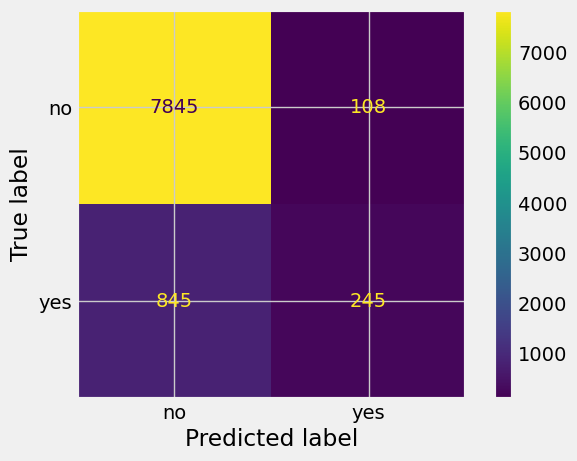

In [89]:
### Import confusion_matrix

### Create confusion matrix
conf_matrix = confusion_matrix (test_labels, prediction,labels=rf.classes_)
print (conf_matrix)
 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                             display_labels=rf.classes_)
disp.plot()

### Plot confusion matrix
#disp = ConfusionMatrixDisplay(rf, test_features, test_labels, display_labels = ['yes' ,'no' ] )

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, prediction, target_names=['no' ,'yes']))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7953
         yes       0.69      0.22      0.34      1090

    accuracy                           0.89      9043
   macro avg       0.80      0.61      0.64      9043
weighted avg       0.88      0.89      0.87      9043



In [107]:
test_labels

0        no
1       yes
2        no
3        no
4        no
       ... 
9038     no
9039     no
9040     no
9041     no
9042     no
Name: y, Length: 9043, dtype: object

### F1 score

In [111]:
from sklearn.metrics import f1_score

y_pred = rf.predict(ef_test)  
f1 = f1_score(test_labels, y_pred, pos_label='yes')  
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.34


### Feature Importance ###

In [100]:
importances = list(rf.feature_importances_)
features_list = ef_train.columns
### List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
 
### Sort the feature importances by most important first 
#(i.e. larger value means more important)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
### Print out the feature and importances 
[print('Variable RF: {:60} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable RF: age                                                          Importance: 0.09
Variable RF: balance                                                      Importance: 0.09
Variable RF: poutcome_success                                             Importance: 0.09
Variable RF: day                                                          Importance: 0.08
Variable RF: pdays                                                        Importance: 0.06
Variable RF: month_encoded                                                Importance: 0.06
Variable RF: poutcome_encoded                                             Importance: 0.05
Variable RF: campaign                                                     Importance: 0.04
Variable RF: previous                                                     Importance: 0.03
Variable RF: job_encoded                                                  Importance: 0.03
Variable RF: education_encoded                                            Importance: 0.02

In [92]:
print(len(importances))

59


In [93]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
 
### Set the style
plt.style.use('fivethirtyeight') # try to replicate the styles from FiveThirtyEight.com.

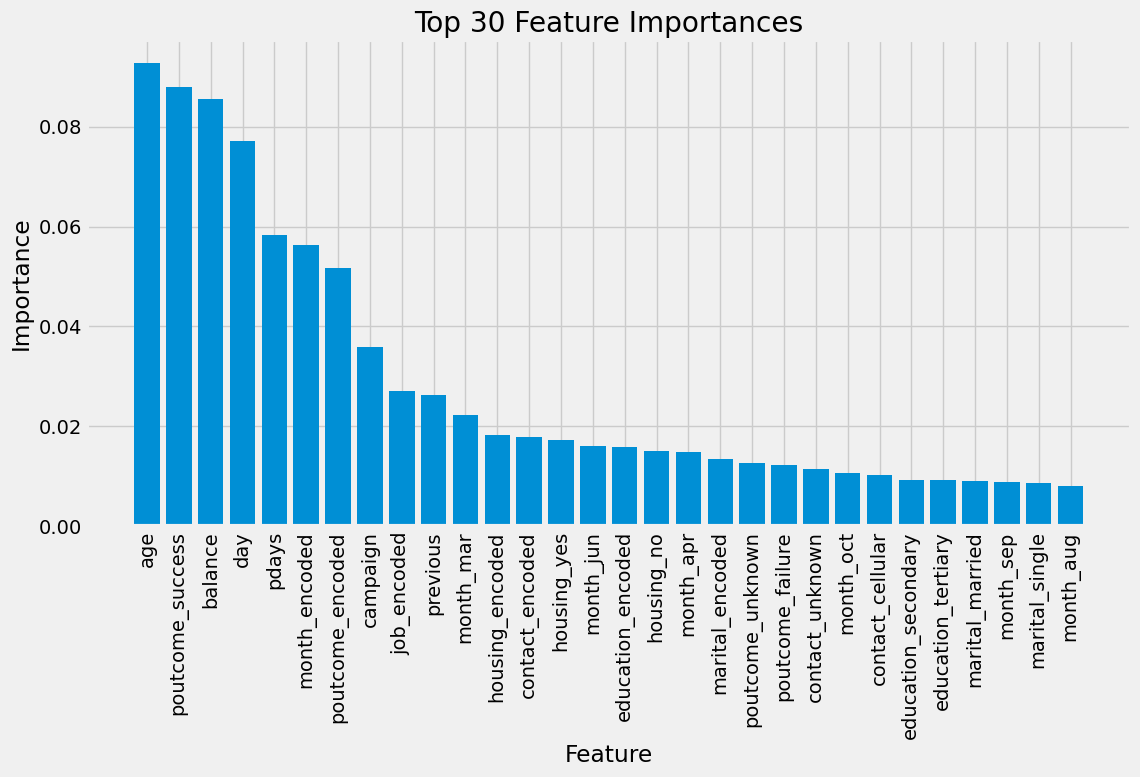

In [94]:
sorted_importances, sorted_features = zip(*sorted(zip(importances, features_list), reverse=True))
top_n = 30  # Number of top features to display

# Take the top N features
top_importances = sorted_importances[:top_n]
top_features = sorted_features[:top_n]

# Create a bar chart for the top N features
x_values = list(range(len(top_importances)))
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(x_values, top_importances, orientation='vertical')
plt.xticks(x_values, top_features, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.show()





### Parameter Tuning

Text(0, 0.5, 'Testing Accuracy')

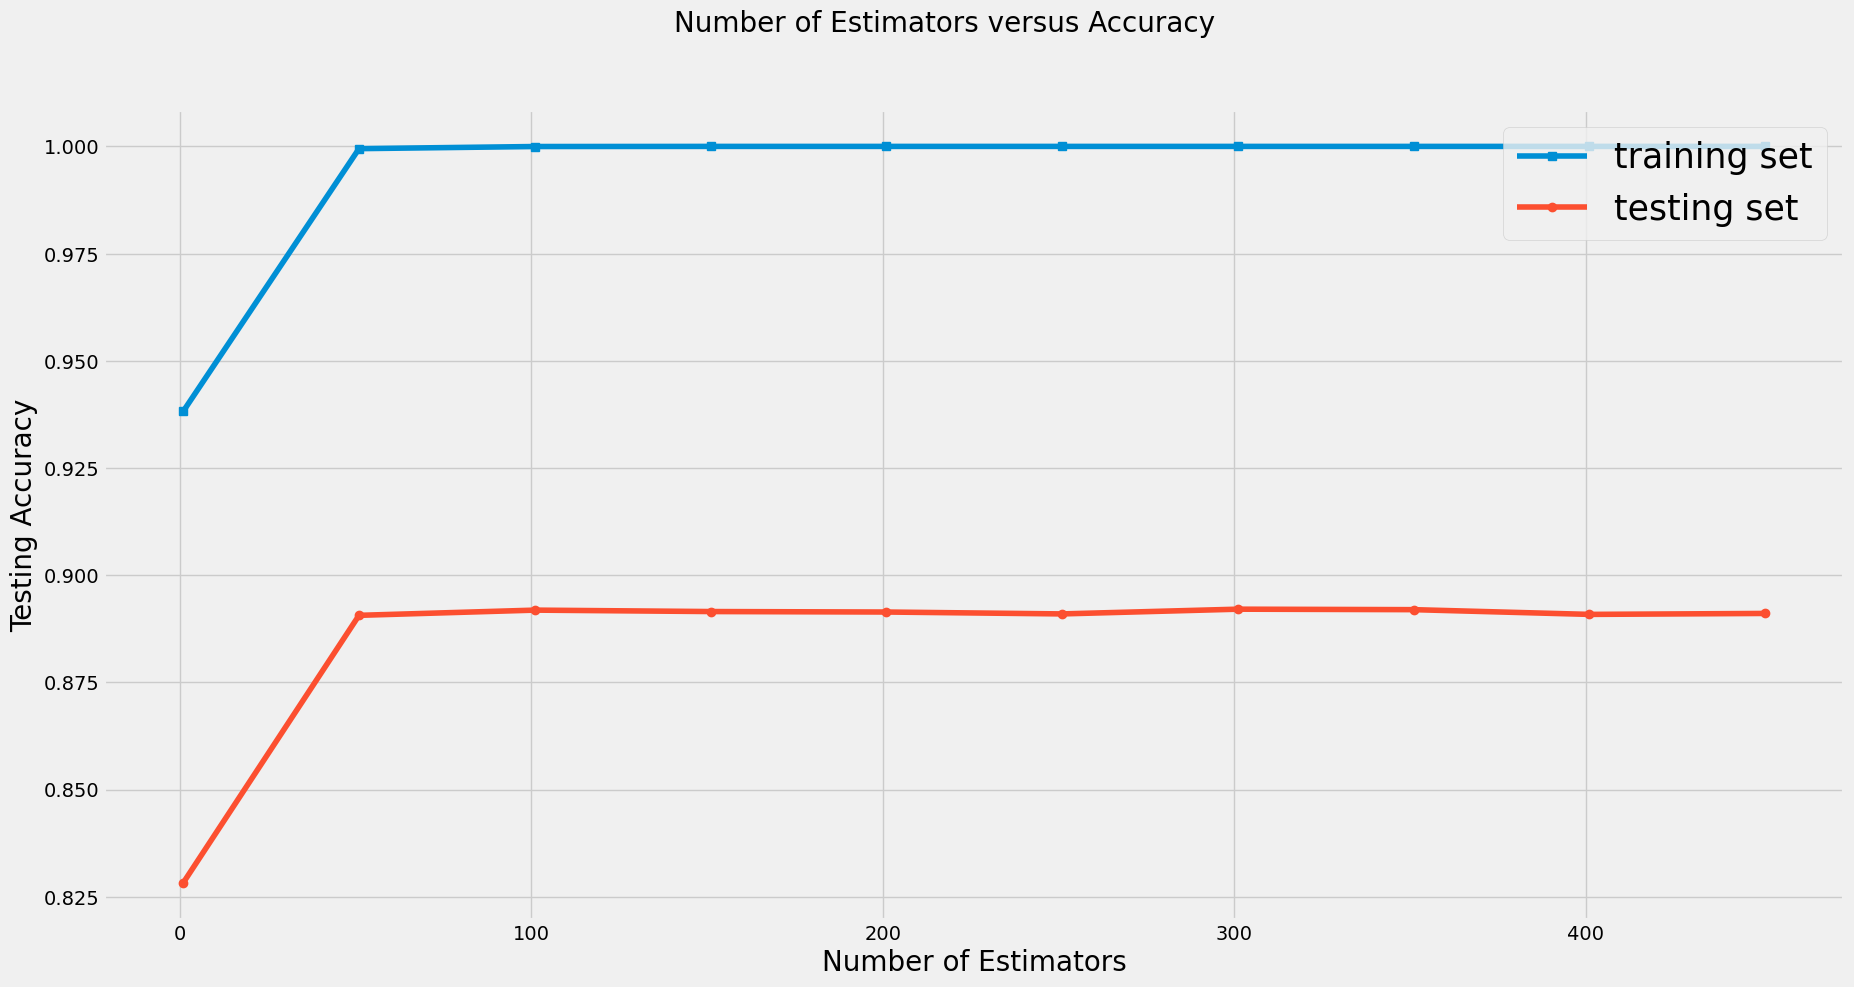

In [58]:
# see number of estimator versus accuracy
import matplotlib.pyplot as plt
score_array_train =[]
score_array_test =[]

num_estimators = []
for k in range(1,501,50):
    clf = RandomForestClassifier(n_estimators=k, random_state=1) #The maximum depth of the tree.
    clf = clf.fit(ef_train, train_labels)
    
    #Predict the response for test dataset
    score_array_train.append(clf.score(ef_train, train_labels))
    
    
    #Predict the response for test dataset
    score_array_test.append(clf.score(ef_test, test_labels))
    
    num_estimators.append(k)
    
fig = plt.figure(figsize=(20, 10))

plt.plot(num_estimators, score_array_train, marker='s', label="training set") #training uses square as markers
plt.plot(num_estimators, score_array_test, marker='o', label="testing set") #test uses circle as markers
plt.legend(loc="upper right",fontsize="25")
fig.suptitle('Number of Estimators versus Accuracy', fontsize=20)
plt.xlabel('Number of Estimators', fontsize=20)
plt.ylabel('Testing Accuracy', fontsize=20)

Text(0, 0.5, 'Testing Accuracy')

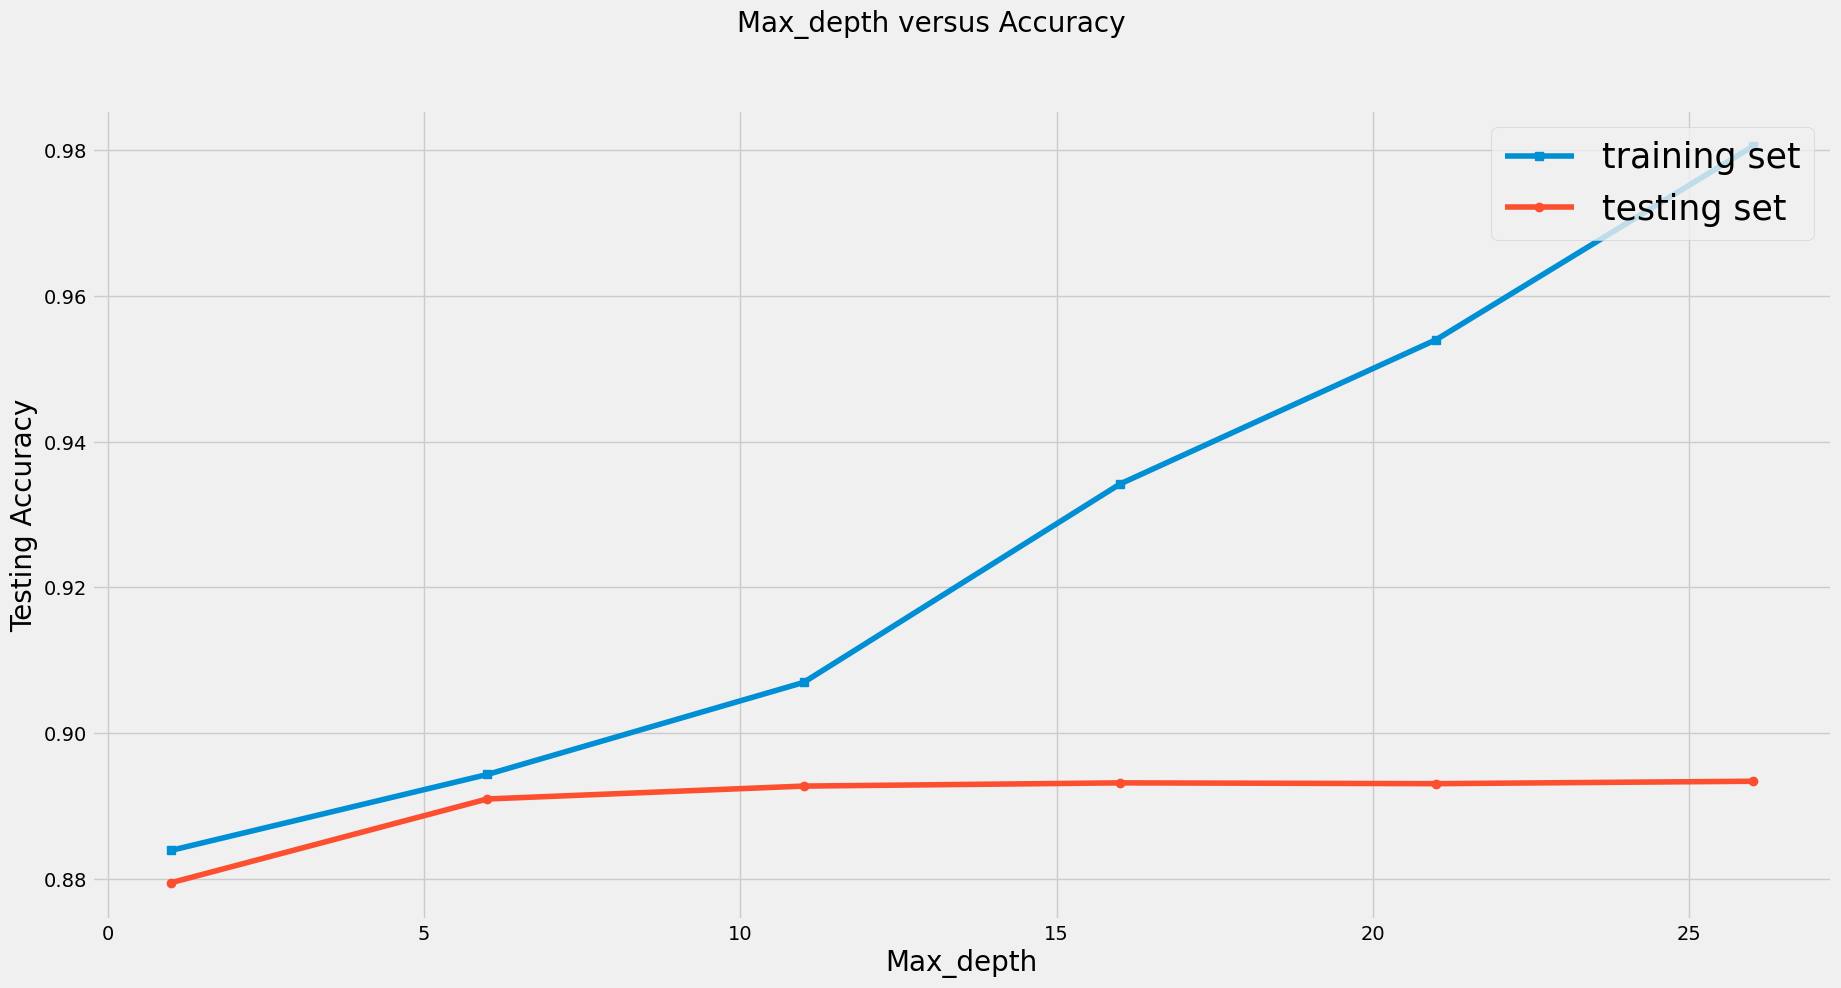

In [82]:
# see number of estimator versus accuracy
import matplotlib.pyplot as plt
score_array_train =[]
score_array_test =[]

maxdepth = []
for k in range(1,31,5):
    clf = RandomForestClassifier(n_estimators=125, random_state=1,max_depth= k) #The maximum depth of the tree.
    clf = clf.fit(ef_train, train_labels)
    
    #Predict the response for test dataset
    score_array_train.append(clf.score(ef_train, train_labels))
    
    
    #Predict the response for test dataset
    score_array_test.append(clf.score(ef_test, test_labels))
    
    maxdepth.append(k)
    
fig = plt.figure(figsize=(20, 10))

plt.plot(num_estimators, score_array_train, marker='s', label="training set") #training uses square as markers
plt.plot(num_estimators, score_array_test, marker='o', label="testing set") #test uses circle as markers
plt.legend(loc="upper right",fontsize="25")
fig.suptitle('Max_depth versus Accuracy', fontsize=20)
plt.xlabel('Max_depth', fontsize=20)
plt.ylabel('Testing Accuracy', fontsize=20)

In [186]:
train_labels.head()


33413     no
23506     no
18848    yes
22217     no
3164      no
Name: y, dtype: object

### MCC

In [79]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(test_labels, prediction)
print(mcc)

0.3550231066629923


In [35]:
train_labels

0        no
1        no
2        no
3        no
4        no
         ..
36163    no
36164    no
36165    no
36166    no
36167    no
Name: y, Length: 36168, dtype: object

### Visualize a  tree

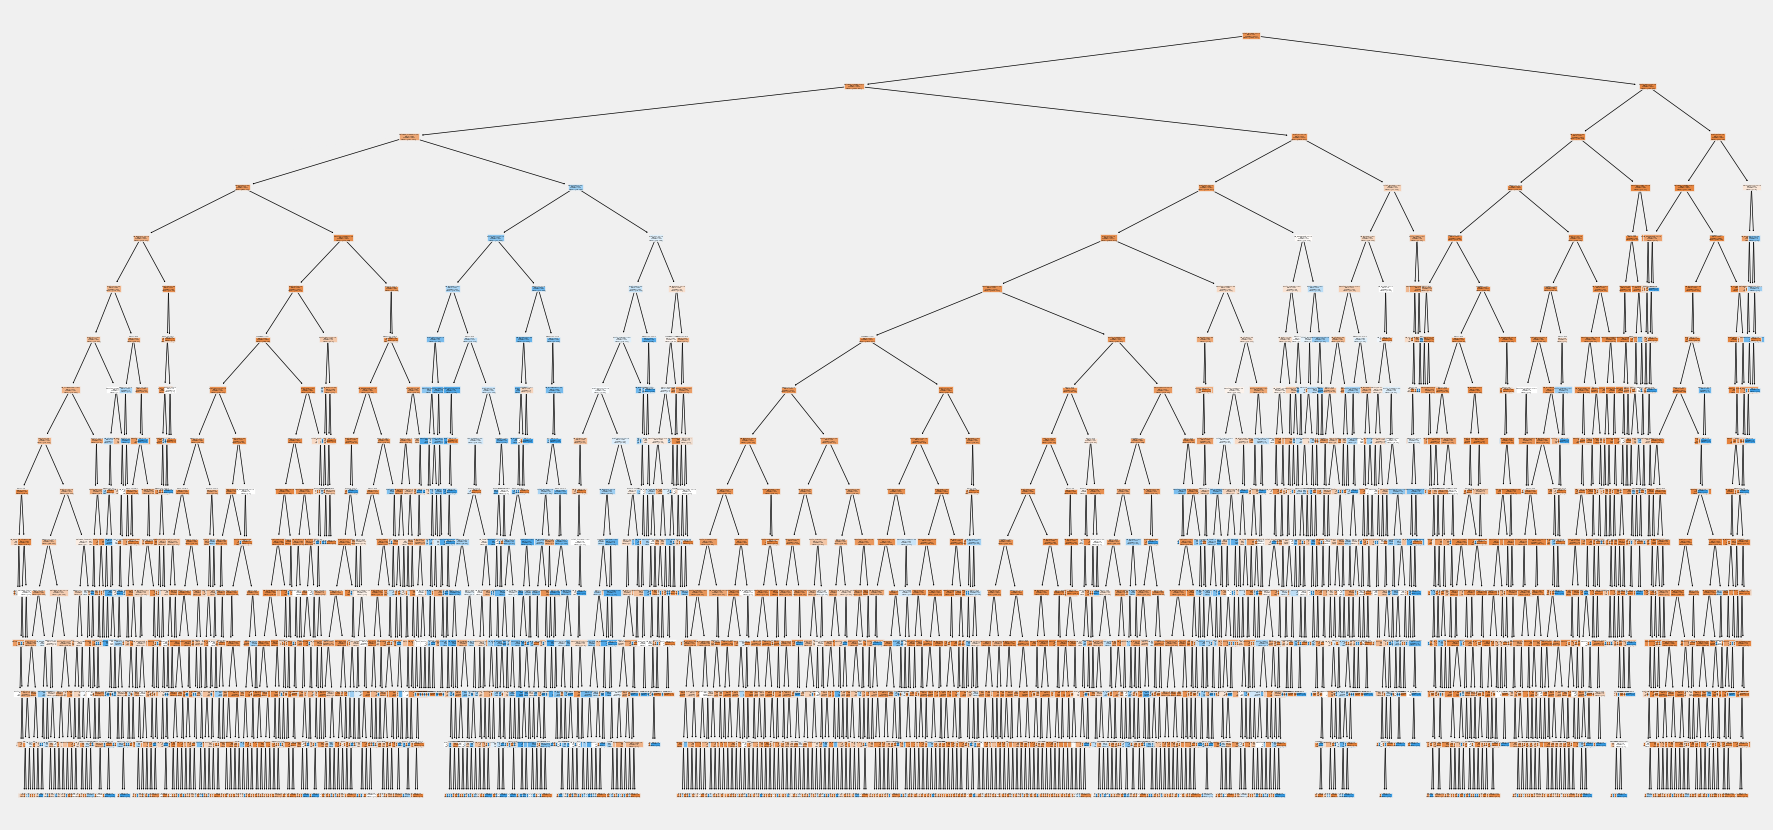

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=list(ef_train.columns))
plt.show()


### Roc

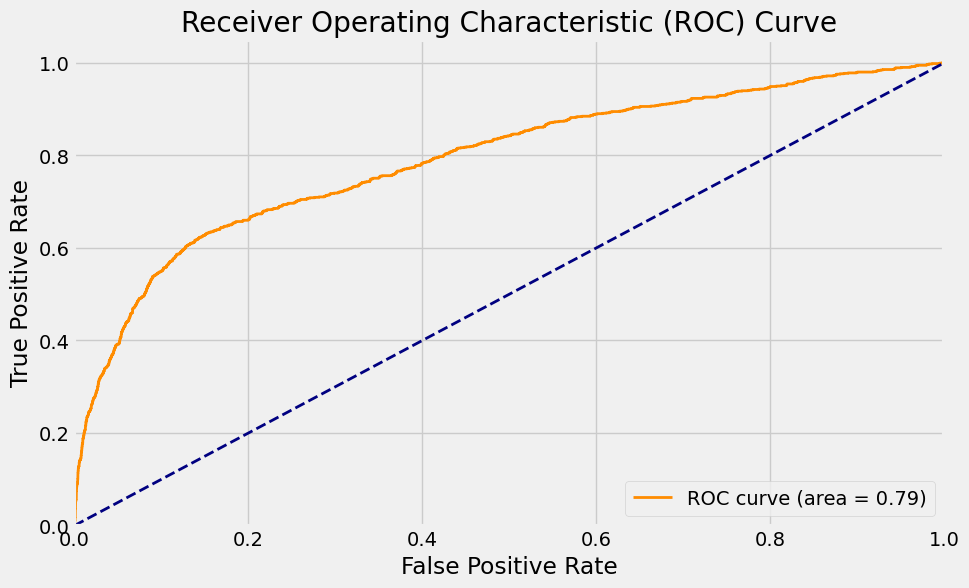

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained your Random Forest model
y_scores = rf.predict_proba(ef_test)[:, 1]  # Probability scores for the positive class

# Convert your "yes" and "no" labels to binary labels, e.g., 1 for "yes" and 0 for "no"
y_true = [1 if label == 'yes' else 0 for label in test_labels]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Fit the model with only top 20 important features

In [104]:
importances = rf.feature_importances_
feature_names = ef_train.columns  # Assuming you have column names for your features
sorted_indices = (-importances).argsort()  # Sort in descending order

# 3. Select the Top Features
top_n = 20  # Choose the number of top features you want to keep
top_feature_indices = sorted_indices[:top_n]
selected_features = feature_names[top_feature_indices]

# 4. Create a New Dataset
X_train_selected = ef_train[selected_features]
X_test_selected = ef_test[selected_features]

# 5. Train the Model
rf_selected = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=15, oob_score= True)
rf_selected.fit(X_train_selected, train_labels)


RandomForestClassifier(max_depth=15, oob_score=True, random_state=1)

In [105]:
print(rf_selected.oob_score_)

0.8932758239327583


In [52]:
### Get the prediction score
test_score = rf_selected.score(X_test_selected, test_labels) 
# including to use rf to predict test data test_features and 
# comparison with ground truth test_labels

print ("Testing Performance:", "%.4f" % test_score)

Testing Performance: 0.8909


Predicted Labels: ['no' 'yes'] = [8618  425]
[[7792  161]
 [ 826  264]]


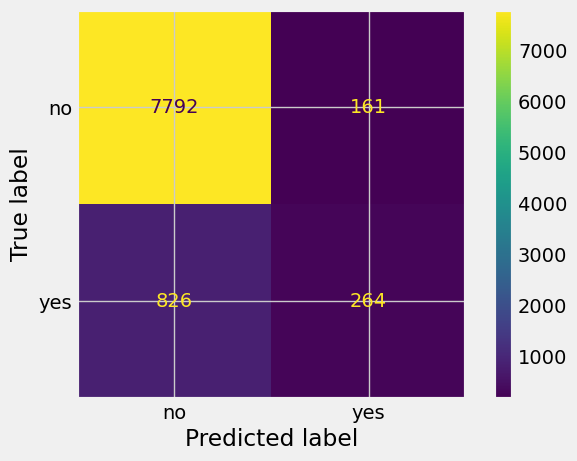

In [53]:
### Get the predicted labels
prediction = rf_selected.predict(X_test_selected)

#We want to get how many examples in each class in test data
count_prediction = np.unique(prediction, return_counts=True)
print('Predicted Labels:', count_prediction[0], "=", count_prediction[1])
### Import confusion_matrix

### Create confusion matrix
conf_matrix = confusion_matrix (test_labels, prediction,labels=rf.classes_)
print (conf_matrix)
 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                             display_labels=rf.classes_)
disp.plot()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, prediction, target_names=['no' ,'yes' ]))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7953
         yes       0.62      0.24      0.35      1090

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



Text(0, 0.5, 'Testing Accuracy')

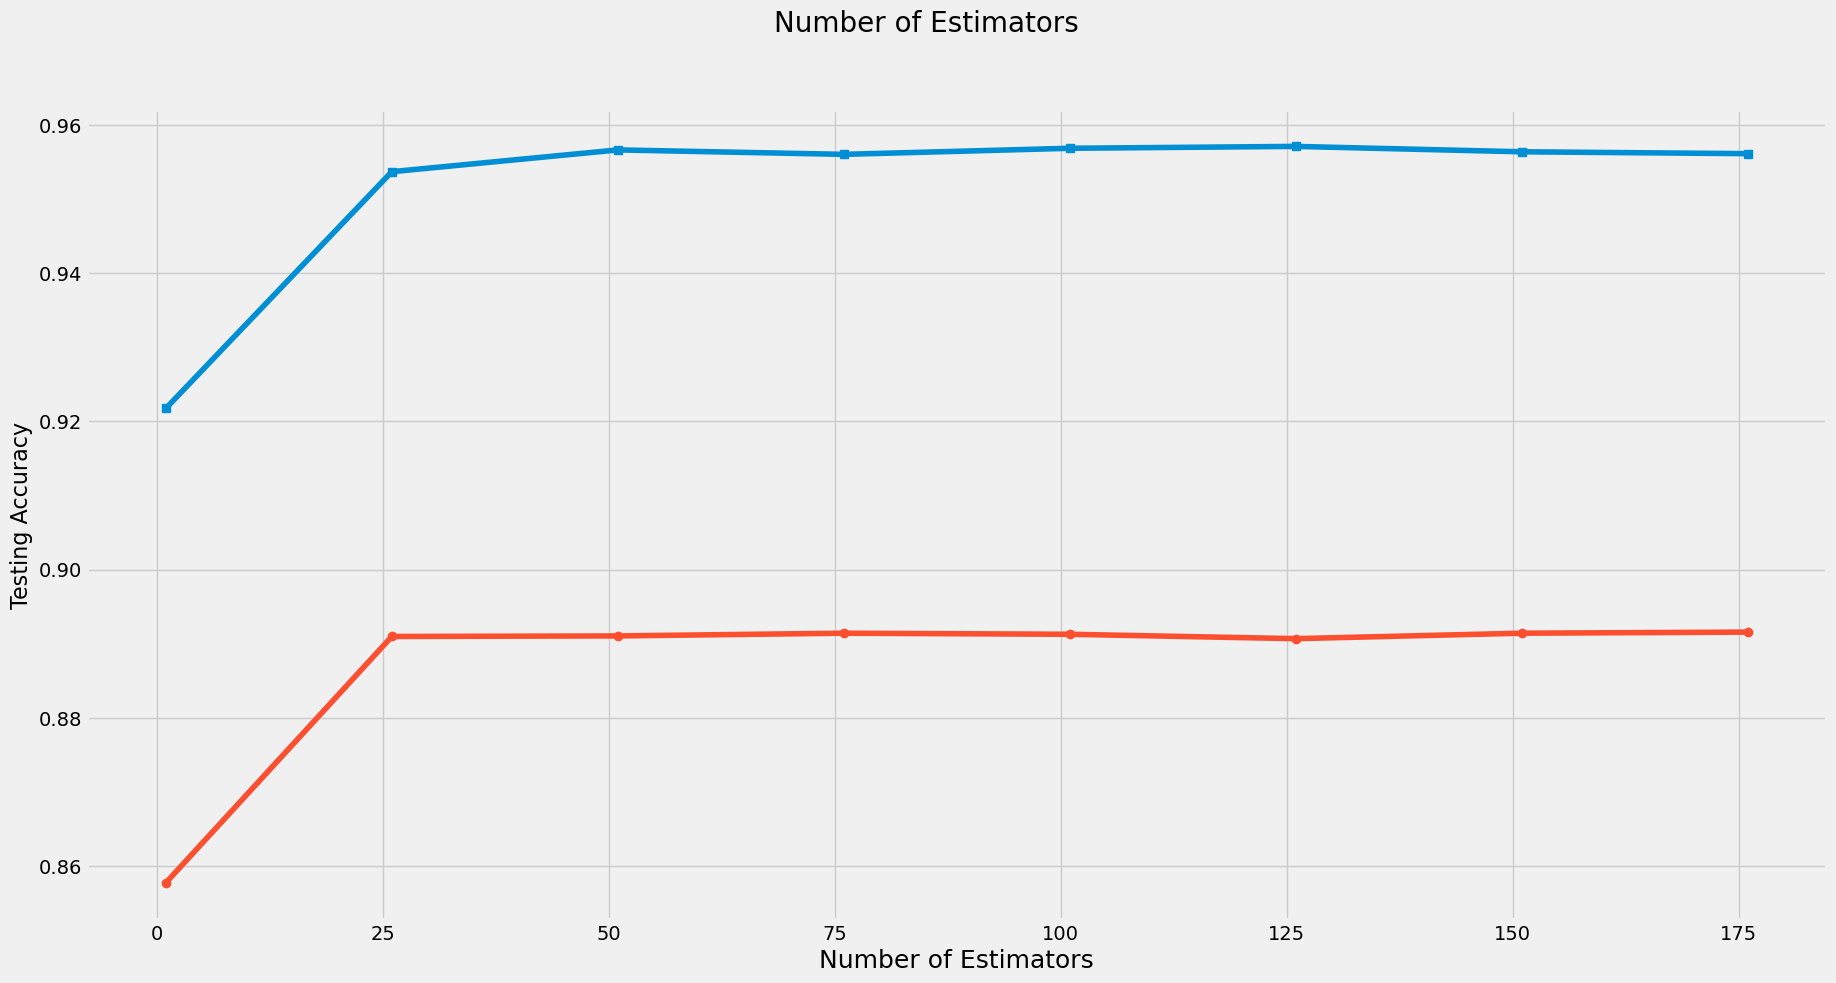

In [183]:
# see number of estimator versus accuracy
import matplotlib.pyplot as plt
score_array_train =[]
score_array_test =[]

num_estimators = []
for k in range(1,201,25):
    clf = RandomForestClassifier(n_estimators=k, random_state=1, max_depth=20) #The maximum depth of the tree.
    clf = clf.fit(X_train_selected, train_labels)
    
    #Predict the response for test dataset
    score_array_train.append(clf.score(X_train_selected, train_labels))
    
    
    #Predict the response for test dataset
    score_array_test.append(clf.score(X_test_selected, test_labels))
    
    num_estimators.append(k)
    
fig = plt.figure(figsize=(20, 10))

plt.plot(num_estimators, score_array_train, marker='s') #training uses square as markers
plt.plot(num_estimators, score_array_test, marker='o') #test uses circle as markers
fig.suptitle('Number of Estimators', fontsize=20)
plt.xlabel('Number of Estimators', fontsize=18)
plt.ylabel('Testing Accuracy', fontsize=16)